In [1]:
import pandas as pd


In [2]:
file_path = 'data/drug_cids.csv'

df = pd.read_csv(file_path)


In [10]:
df.shape

(11783, 2)

In [3]:
print(df.head())


    Drug Name       CIDs
0  Naltrexone     4428.0
1  Naltrexone  5360515.0
2  Naltrexone  5702239.0
3  Naltrexone  6321302.0
4  Naltrexone  6604527.0


In [4]:
print(df.columns.tolist())


['Drug Name', 'CIDs']


In [5]:
unique_drug_names_count = df['Drug Name'].nunique()
print(unique_drug_names_count)


1757


In [8]:
#Count of drugs that are associated with the most CIDs (top 20)
drug_name_counts = df['Drug Name'].value_counts()

print(drug_name_counts.head(20))


Drug Name
Ursodeoxycholic acid    63
Cyanocobalamin          63
Rifampicin              51
Adenosine               51
Everolimus              50
Estradiol               48
Cholic Acid             48
Sirolimus               44
Quinidine               43
Sodium chloride         41
Dexamethasone           41
Nystatin                40
Calcitriol              40
Hydrocortisone          40
Amphotericin B          40
Ivermectin              39
Cholecalciferol         38
Tacrolimus              38
Carboplatin             38
Hydroxocobalamin        37
Name: count, dtype: int64


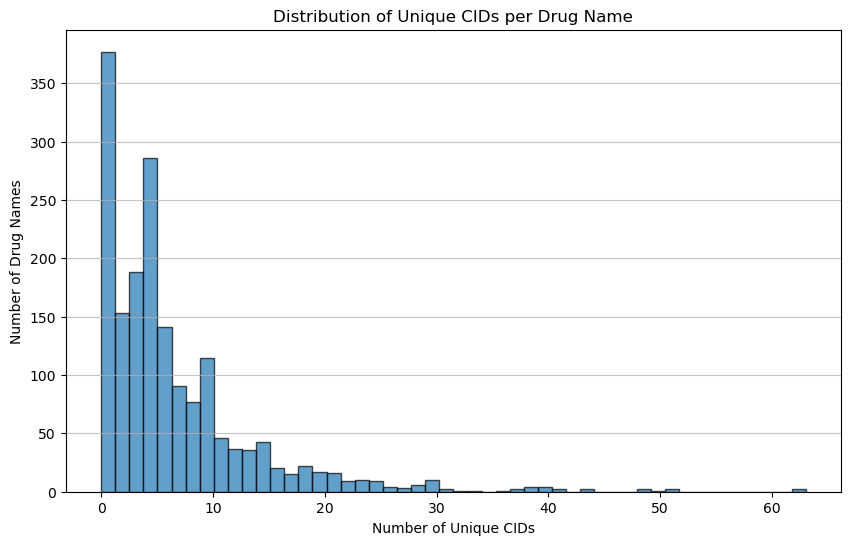

In [20]:
import matplotlib.pyplot as plt

unique_cids_per_drug = df.groupby('Drug Name')['CIDs'].nunique()

plt.figure(figsize=(10, 6))
plt.hist(unique_cids_per_drug, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Unique CIDs per Drug Name')
plt.xlabel('Number of Unique CIDs')
plt.ylabel('Number of Drug Names')
plt.grid(axis='y', alpha=0.75)

plt.show()


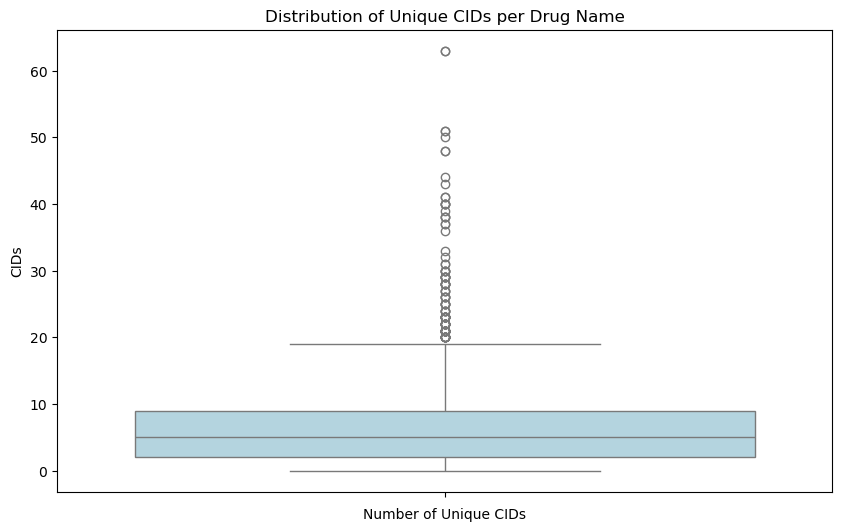

In [22]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(unique_cids_per_drug, color='lightblue')
plt.title('Distribution of Unique CIDs per Drug Name')
plt.xlabel('Number of Unique CIDs')
plt.show()

#median number of uniques CIDs associated with each Drug Name looks to be ~5

In [24]:
#List of drugs associated with >1 CID

unique_cids_per_drug = df.groupby('Drug Name')['CIDs'].nunique()
drugs_with_multiple_cids = unique_cids_per_drug[unique_cids_per_drug > 1].index.tolist()

len(drugs_with_multiple_cids)


1380

In [ ]:
# Load DataFrames
import pandas as pd

# File paths
ddinter_path = "data/ddinter_downloads_code_A.csv"
drug_cids_path = "data/drug_cids.csv"

In [ ]:
ddinter_df = pd.read_csv(ddinter_path)
drug_cids_df = pd.read_csv(drug_cids_path)

In [ ]:
# Clean the 'Level' column
# Map textual interaction levels to numeric values for consistency.
level_mapping = {'Minor': 0, 'Moderate': 1, 'Major': 2}
print(ddinter_df['Level'].unique())

In [ ]:
# Remove rows with 'Unknown' or NaN in Level column
# We don't want interactions labeled as 'Unknown' or missing values.
rows_before = ddinter_df.shape[0]
ddinter_df = ddinter_df[ddinter_df['Level'] != 'Unknown']
ddinter_df = ddinter_df.dropna(subset=['Level'])
rows_after = ddinter_df.shape[0]
print(rows_before)
print(rows_after)

In [ ]:
# Map Level values to integers
ddinter_df['Level'] = ddinter_df['Level'].map(level_mapping)
# Ensure that the Level column is integer type
ddinter_df['Level'] = ddinter_df['Level'].astype(int)

In [ ]:
# Merge CID data
# Rename the column in the CID data to ensure compatibility during merging.
drug_cids_df.rename(columns={'CIDs': 'cid'}, inplace=True)

# Merge the interaction data with CID data for Drug_A and Drug_B.
ddinter_merged_A = pd.merge(ddinter_df, drug_cids_df, left_on='Drug_A', right_on='Drug Name', how='inner')
ddinter_merged_AB = pd.merge(ddinter_merged_A, drug_cids_df, left_on='Drug_B', right_on='Drug Name', how='inner', suffixes=('_A', '_B'))


In [ ]:
# Group by Drug_A and Drug_B to check for varying interaction levels
interaction_level_variation = ddinter_merged_AB.groupby(['Drug_A', 'Drug_B'])['Level'].nunique()

In [ ]:
# Identify inconsistent interactions where the same drug pair has more than one interaction level
inconsistent_interactions = interaction_level_variation[interaction_level_variation > 1]
print(inconsistent_interactions)

#Empty df means that there are no cases when two drugs of the same name are associated with more than 1 type (level) of drug interaction.
#In other words, all drug interactions are consistent and not influenced by differences in CID.